In [ ]:
#The purpose of the notebook is to demonstrate the outcome of simple spectral analysis.

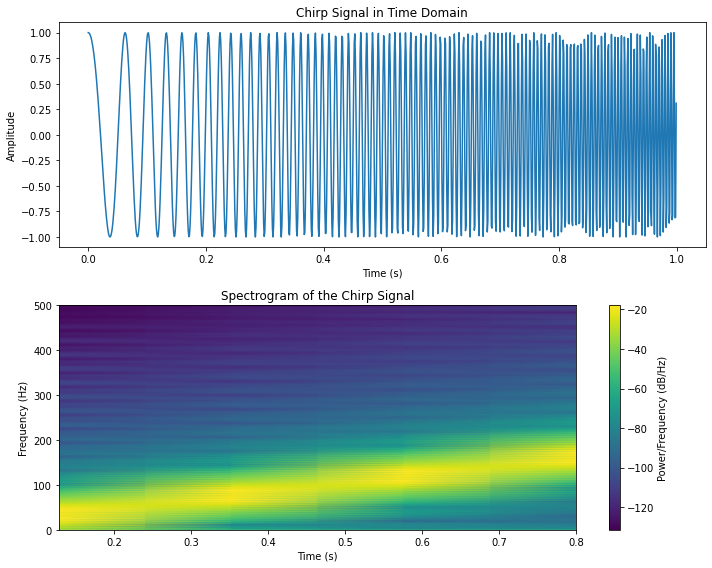

✅ Chirp signal saved as 'chirp_signal.wav'. Play it in any media player!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wavfile

# 📢 Explanation:
# A chirp signal is a signal in which the frequency increases (or decreases) over time.
# In this example, we generate a **linear chirp** where the frequency starts at 10 Hz and increases to 200 Hz over 1 second.

# Define parameters
fs = 1000  # Sampling frequency (Hz)
duration = 1  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate chirp signal (frequency increases from 10 Hz to 200 Hz)
chirp_signal = signal.chirp(t, f0=10, f1=200, t1=duration, method='linear')

# 📢 Explanation:
# A spectrogram is a time-frequency representation of a signal.
# It shows how the frequency content of a signal changes over time.
# To compute a spectrogram, we divide the signal into small overlapping time windows, apply the Fast Fourier Transform (FFT) to each segment, and plot the frequency content over time.

# Compute spectrogram using the Short-Time Fourier Transform (STFT)
frequencies, times, Sxx = signal.spectrogram(chirp_signal, fs)

# Plot the chirp signal waveform and its spectrogram
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 📢 Explanation:
# The first plot shows the chirp signal in the time domain. You can see how its frequency increases over time.
axes[0].plot(t, chirp_signal)
axes[0].set_title("Chirp Signal in Time Domain")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")

# 📢 Explanation:
# The second plot shows the spectrogram. The color intensity represents how much energy a frequency component has at a given time.
cax = axes[1].pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
fig.colorbar(cax, ax=axes[1], label='Power/Frequency (dB/Hz)')
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Frequency (Hz)")
axes[1].set_title("Spectrogram of the Chirp Signal")

plt.tight_layout()
plt.show()

# 📢 Explanation:
# We can also save the chirp signal as an audio file so you can listen to it.
# The file is saved in WAV format and can be played with any media player.

# Normalize the signal for WAV format (convert to 16-bit integer)
chirp_signal_normalized = np.int16(chirp_signal / np.max(np.abs(chirp_signal)) * 32767)

# Save the chirp signal as a WAV file
wavfile.write("chirp_signal.wav", fs, chirp_signal_normalized)

print("✅ Chirp signal saved as 'chirp_signal.wav'. Play it in any media player!")

In [9]:
# 📢 Now let's try to analyse the spectral components of a music signal.
# This script reads a WAV file (music track), computes its spectrogram, and visualizes the frequency content over time.

# Load the music file (Make sure you have a WAV file named 'music.wav' in the same directory)
fs, music_signal = wavfile.read("music.wav")  # Load WAV file

# 📢 Explanation for Students:
# If the audio is stereo (2 channels), convert it to mono by averaging both channels
if len(music_signal.shape) > 1:
    music_signal = np.mean(music_signal, axis=1)  # Convert to mono

# 📢 Explanation for Students:
# Compute the spectrogram using the Short-Time Fourier Transform (STFT)
frequencies, times, Sxx = signal.spectrogram(music_signal, fs)

# Plot the waveform and spectrogram
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 📢 Explanation for Students:
# The first plot shows the music waveform in the time domain.
time_axis = np.linspace(0, len(music_signal) / fs, num=len(music_signal))
axes[0].plot(time_axis, music_signal)
axes[0].set_title("Music Signal in Time Domain")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")

# 📢 Explanation for Students:
# The second plot is the spectrogram, showing how the frequency content changes over time.
cax = axes[1].pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
fig.colorbar(cax, ax=axes[1], label='Power/Frequency (dB/Hz)')
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Frequency (Hz)")
axes[1].set_title("Spectrogram of the Music Track")

plt.tight_layout()
plt.show()

print("✅ Spectrogram generated successfully!")

FileNotFoundError: [Errno 2] No such file or directory: 'music.wav'